# Imports

In [206]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Loading dataset and turning ints into floats for better performace

In [209]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Creating model

In [210]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [211]:
x_train.shape
x_test.shape

(10000, 28, 28, 1)

In [239]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [246]:
model.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_27 (Bat  (None, 13, 13, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                     

# Making predictions and turning them into probability

In [214]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.10652686, 0.10980847, 0.10113585, 0.10819134, 0.07961342,
        0.09039415, 0.08522294, 0.13157158, 0.09104204, 0.0964933 ]],
      dtype=float32)

In [215]:
tf.nn.softmax(predictions).numpy()

array([[0.10064462, 0.10097543, 0.10010349, 0.10081226, 0.09797204,
        0.09903397, 0.09852316, 0.10319705, 0.09909815, 0.09963984]],
      dtype=float32)

# Creating loss function

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

In [216]:
loss_fn(y_train[:1], predictions).numpy()

2.4035757

# Adding optimizer, loss function and metrics to the model

In [243]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=7e-4, momentum=0.15, centered=True), loss=loss_fn, metrics=['accuracy'])

# Training the model

In [244]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0274 - val_accuracy: 0.9920
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.0245 - val_accuracy: 0.9936
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.0278 - val_accuracy: 0.9928
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.0288 - val_accuracy: 0.9920
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0381 - val_accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.0306 - val_accuracy: 0.9925
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0335 - val_ac

# Evaluating trained model by test data

In [245]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0280 - accuracy: 0.9941 - 1s/epoch - 5ms/step


[0.027952199801802635, 0.9940999746322632]

# Plotting the loss value and accuracy on both train and test data

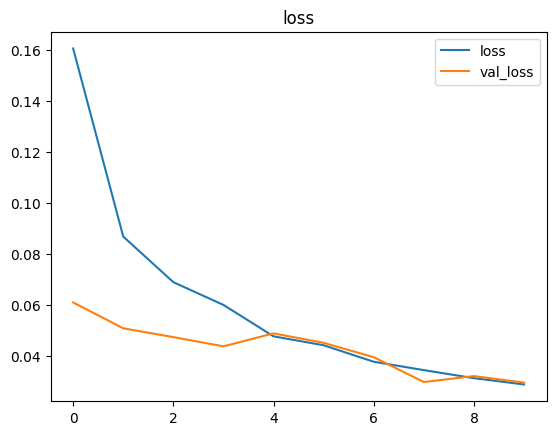

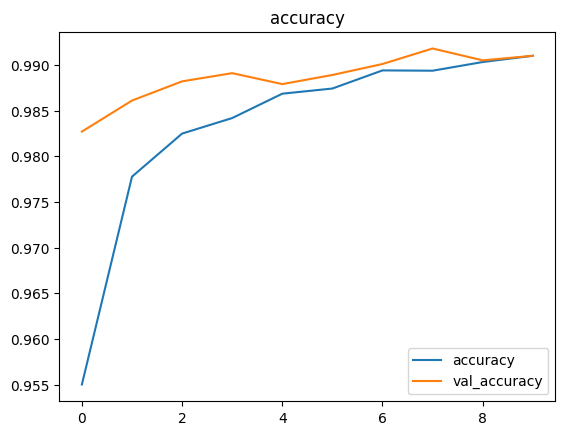

In [242]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()
plt.show()